Light has long been a sculptor of matter, an invisible hand guiding the behaviour of molecules, reshaping structures, and fueling the very essence of life. From the delicate choreography of excitons in photosynthetic systems to the fiery fragmentation of photodissociation, the interaction between light and molecules is a symphony of quantum phenomena. And now, with quantum computing, we can peer deeper into this intricate realm, not just observing but simulating, predicting, and even manipulating these delicate processes at an unprecedented scale.



We will begin with exciton dynamics in molecular systems, tracing the elegant journey of energy as it transfers through molecular crystals and organic photovoltaics. In photosynthetic complexes, this process is the very foundation of nature’s ability to harvest sunlight—an exquisite quantum mechanical dance that we now strive to model and understand.



But excitons are only the beginning. The very act of molecular excitation—the absorption of a photon that propels a system into a higher energy state—can be captured using Hamiltonians such as the Jaynes-Cummings model or the Rabi model, allowing us to construct quantum circuits that mirror these transitions. The challenge deepens as we explore non-adiabatic couplings, where molecules transition between potential energy surfaces, breaking free from the constraints of classical approximations. These transitions are the key to photochemical reactions, the very essence of molecular transformations driven by light.



We will dive into the fascinating pathways of photoisomerization, where light sculpts new molecular forms, flipping structures in retinal proteins and azobenzene molecules. The very colors we see, the ways in which life senses and responds to light, are dictated by these quantum transitions. And through quantum simulations of UV/Vis absorption spectra, we unravel the spectral fingerprints of molecules, revealing their hidden interactions with electromagnetic radiation.



Some transformations are more dramatic—photodissociation dynamics chart the fragmentation of molecular bonds under the searing influence of light, a process essential to atmospheric chemistry, combustion, and even astrochemical evolution. But while bonds may break, new connections are also forged through resonance energy transfer—a process at the heart of Förster Resonance Energy Transfer (FRET) and Dexter mechanisms, where energy leaps from one molecule to another like a whispered secret.



Yet, to fully grasp the quantum nature of light-matter interaction, we must extend our reach into quantum optics, where the electromagnetic field itself is quantized. Here, we study photon creation, annihilation, and the surreal entanglement of light and molecules, bridging chemistry and quantum physics. The intrigue only deepens with polariton chemistry, where molecules couple with optical cavities, birthing hybrid states that shift energy landscapes and redefine chemical reactivity.



Time is another frontier. With time-resolved photoelectron spectroscopy simulations, we capture the fleeting motion of electrons under femtosecond laser pulses, unearthing ultrafast reaction dynamics that escape classical description. But beyond merely observing, we can also coherently control these photochemical processes, designing precise light pulses that steer reactions along chosen paths, leveraging quantum interference to reshape chemical outcomes.



For those who embrace the profound depth of quantum mechanics, path integral methods offer yet another approach to modeling photochemistry, explicitly incorporating coherence effects that shape molecular dynamics. In the realm of light-mediated charge transfer, quantum simulations allow us to map the flow of electrons through molecular systems after photon absorption—a crucial mechanism underpinning solar energy conversion and artificial photosynthesis.



We will be dissecting these concepts in the next articles with elaborate discussions and simulations using 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector

%matplotlib inline

In [2]:
# Define system parameters
omega_q = 1.0  # Qubit (atom) frequency
omega_c = 1.0  # Cavity (photon) frequency
g = 0.1        # Coupling strength
t = np.pi / (2 * g)  # Evolution time

In [3]:
# Create quantum circuit (1 qubit simulating the atom-light interaction)
qc_bloch = QuantumCircuit(1)
qc_bloch.h(0) # Initial state preparation: |+> state (superposition)
qc_bloch.rz(omega_q * t, 0)
qc_bloch.rx(2 * g * t, 0)

In [4]:

# Bloch Sphere Visualization
state = Statevector(qc_bloch)
bloch_vector = state.probabilities()

In [5]:
# Calculate Bloch vector components
theta = 2 * g * t
phi = omega_q * t
bloch_vec = [np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)]


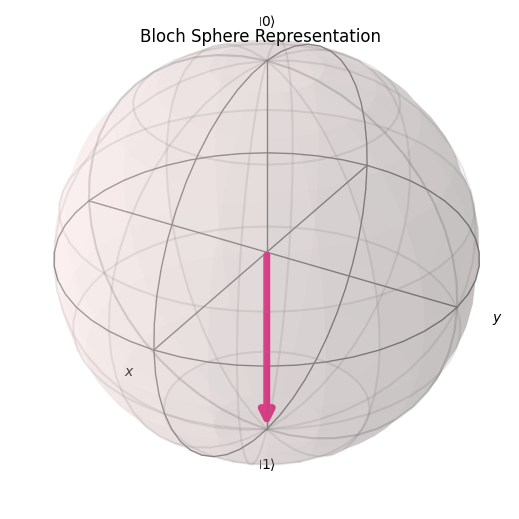

In [6]:
# Plot Bloch vector
plot_bloch_vector(bloch_vec)
plt.title("Bloch Sphere Representation")
plt.show()

In [7]:

# Create a separate circuit for measurement
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(omega_q * t, 0)
qc.rx(2 * g * t, 0)
qc.measure_all()

In [8]:

# Simulate using AerSimulator
simulator = AerSimulator()
compiled_qc = transpile(qc, simulator)
result = simulator.run(compiled_qc, shots=1024).result()
counts = result.get_counts()

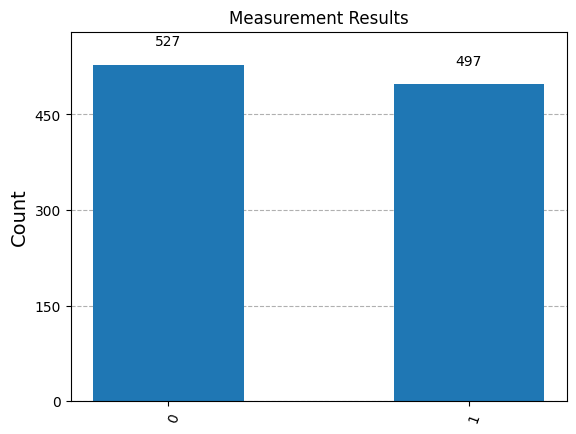

In [9]:
# Plot the measurement results
plot_histogram(counts)
plt.title("Measurement Results")
plt.show()

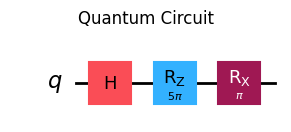

In [10]:
# Visualize the circuit
qc_bloch.draw('mpl')
plt.title("Quantum Circuit")
plt.show()